In [1]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

from __future__ import division

/Users/ajstern/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_data(data):
    '''
    helper function to get the timestamp and 3-component acceleration data. 
    '''
    # read in x, y, z data
    x = data['data']['x']
    y = data['data']['y']
    z = data['data']['z']

    # calculate the timestamp
    # get the start time
    t0 = data['header']['starttime']
    npoints = len(x)
    sampling_rate = data['header']['sampling_rate']
    
    # get the end time 
    t1 = t0 + npoints / sampling_rate
    
    # form the timestamp
    t = np.arange(t0, t1, 1/sampling_rate)
    return t, x, y, z

def plot_data(t, x, y, z):
    '''
    helper function to plot the 3-component acceleration data
    '''
    plt.subplot(311)
    plt.plot(t, x)
    plt.subplot(312)
    plt.plot(t, y)
    plt.ylabel('Acceleration (g)')
    plt.subplot(313)
    plt.plot(t, z)
    plt.xlabel('Time (sec)')
    plt.show()

_________
# Amplitude ratio analysis

In [5]:
def band_amplitudes(spec,window=[0,5],numBins=4):
    amp = np.zeros((numBins,window[1]-window[0]))
    band = 1
    for i in range(np.size(spec,0)):
        if band > numBins:
            break
        elif i < band/numBins * np.size(spec,0):
            for (k,j) in enumerate(range(window[0],window[1])):
                amp[band-1,k] += spec[i,j]**2
        else:
            band += 1
    amp_avg = np.sqrt(np.sum(amp,axis=1))
    return amp_avg
    
            

In [6]:
def pairwise_ratios(vec):
    M = len(vec)
    pw = np.zeros(M*(M-1))
    k=0
    for i in range(M):
        for j in range(i)+range(i+1,M):
            pw[k] = vec[i]/vec[j]
            k += 1
    return pw

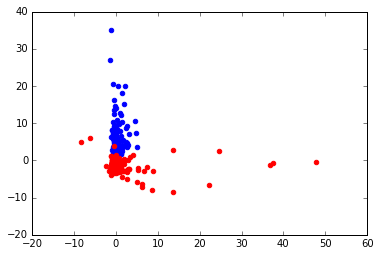

In [29]:
for (i,point) in enumerate(results.Y):
    if i < 192:
        plt.scatter(point[3],point[2],color='blue')
    else:
        plt.scatter(point[3],point[2],color='red')

_______________

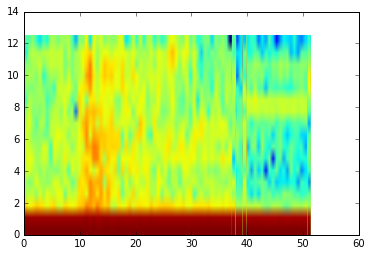

In [14]:
n = len(glob.glob('minidata/shake_table/*'))
features = np.zeros((192,132))

for (i,f) in enumerate(glob.glob('minidata/shake_table/*')):
    data = json.load(open(f, 'rb'))
    t, x, y, z = get_data(data)
    sgX = specgram(x, NFFT=32, Fs=25, noverlap = 16);
    sgY = specgram(y, NFFT=32, Fs=25, noverlap = 16);
    sgZ = specgram(z, NFFT=32, Fs=25, noverlap = 16);
    specX = sgX[0]
    freqX = sgX[1]
    tX = sgX[2]

    specY = sgY[0]
    freqY = sgY[1]
    tY = sgY[2]

    specZ = sgZ[0]
    freqZ = sgZ[1]
    tZ = sgZ[2]

    features[i,:] = pairwise_ratios(np.concatenate((band_amplitudes(specX),band_amplitudes(specY),band_amplitudes(specZ))))

613


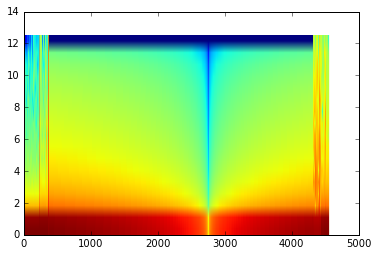

In [21]:
n = len(glob.glob('minidata/human/*'))
print n
features1 = np.zeros((n,132))

for (i,f) in enumerate(glob.glob('minidata/human/*')):
    data = json.load(open(f, 'rb'))
    t, x, y, z = get_data(data)
    sgX = specgram(x, NFFT=32, Fs=25, noverlap = 16);
    sgY = specgram(y, NFFT=32, Fs=25, noverlap = 16);
    sgZ = specgram(z, NFFT=32, Fs=25, noverlap = 16);
    specX = sgX[0]
    freqX = sgX[1]
    tX = sgX[2]

    specY = sgY[0]
    freqY = sgY[1]
    tY = sgY[2]

    specZ = sgZ[0]
    freqZ = sgZ[1]
    tZ = sgZ[2]

    features1[i,:] = pairwise_ratios(np.concatenate((band_amplitudes(specX),band_amplitudes(specY),band_amplitudes(specZ))))

In [25]:
from matplotlib.mlab import PCA
results = PCA(np.concatenate((features,features1),axis=0))

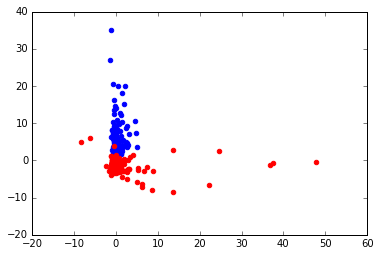

In [28]:
for (i,point) in enumerate(results.Y):
    if i < 192:
        plt.scatter(point[3],point[2],color='blue')
    else:
        plt.scatter(point[3],point[2],color='red')